# MODEL 7 PYSURFER BRAINS
### Change vs. Same Sequential Fixed
### Accounts for last three noisy volumes in Lvl 1 analysis (FSL ROI -- ExtractROI)

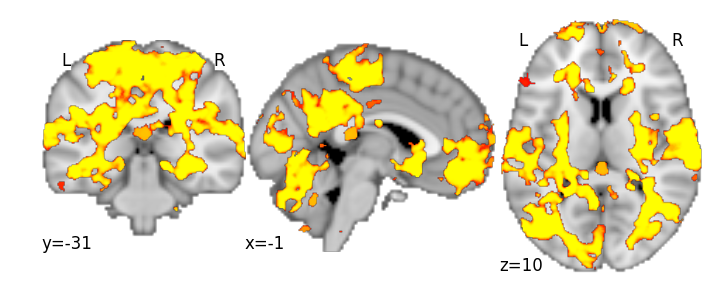

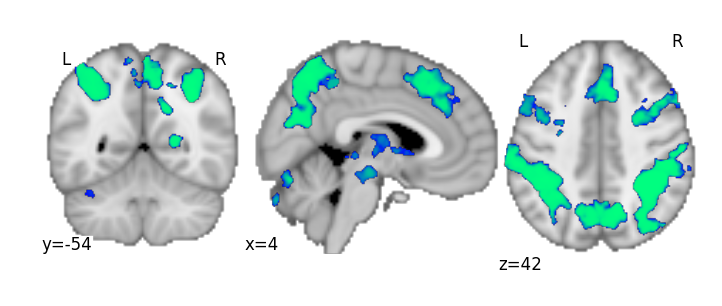

In [3]:
import os
from os.path import join
import nibabel as nb
%matplotlib inline
import matplotlib.pyplot as plt
from nipy.labs.viz_tools.activation_maps import plot_map
from surfer import Brain, io
from IPython.core.display import Image


grplvl_file = join("/home/data/madlab/data/mri/wmaze/grplvl/grplvl_MRthesis_randomise/model3_1-3-2/",
                   "all_corr_minus_all_incorr/output/corrected/",
                   "_contrast_all_corr_minus_all_incorr/oneSampT_tfce_corrp_tstat1.nii.gz")
grplvl_nii = nb.load(grplvl_file)

#Correct conditional minus correct fixed
grplvl_file2 = join("/home/data/madlab/data/mri/wmaze/grplvl/grplvl_MRthesis_randomise/comprehensive2/",
                   "condCorr_minus_fixedCorr/output/corrected/",
                   "_contrast_condCorr_minus_fixedCorr/oneSampT_tfce_corrp_tstat1.nii.gz")
grplvl_nii2 = nb.load(grplvl_file2)


plot_map(grplvl_nii.get_data(), grplvl_nii.get_affine(), threshold = 0.95,
         draw_cross = False, vmin = 0.95, vmax = 1, cmap = 'autumn')
plot_map(grplvl_nii2.get_data(), grplvl_nii2.get_affine(), threshold = 0.95,
         draw_cross=False, vmin = 0.95, vmax = 1, cmap = 'winter')

In [5]:
#If this cell fails, load emu_env, THEN wmaze_env

reg_file = os.path.join(os.environ["FREESURFER_HOME"], "average/mni152.register.dat")
surf_data1 = io.project_volume_data(grplvl_file, "lh", reg_file) #reds
surf_data2 = io.project_volume_data(grplvl_file2, "lh", reg_file) #blues

mri_vol2surf --mov /home/data/madlab/data/mri/wmaze/grplvl/grplvl_MRthesis_randomise/model3_1-3-2/all_corr_minus_all_incorr/output/corrected/_contrast_all_corr_minus_all_incorr/oneSampT_tfce_corrp_tstat1.nii.gz --hemi lh --surf white --reg /home/applications/freesurfer/6.0/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /scratch/R/pysurfer-v2s5xyGWE.mgz
mri_vol2surf --mov /home/data/madlab/data/mri/wmaze/grplvl/grplvl_MRthesis_randomise/comprehensive2/condCorr_minus_fixedCorr/output/corrected/_contrast_condCorr_minus_fixedCorr/oneSampT_tfce_corrp_tstat1.nii.gz --hemi lh --surf white --reg /home/applications/freesurfer/6.0/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /scratch/R/pysurfer-v2sp7Vzfu.mgz


## Left Hemisphere

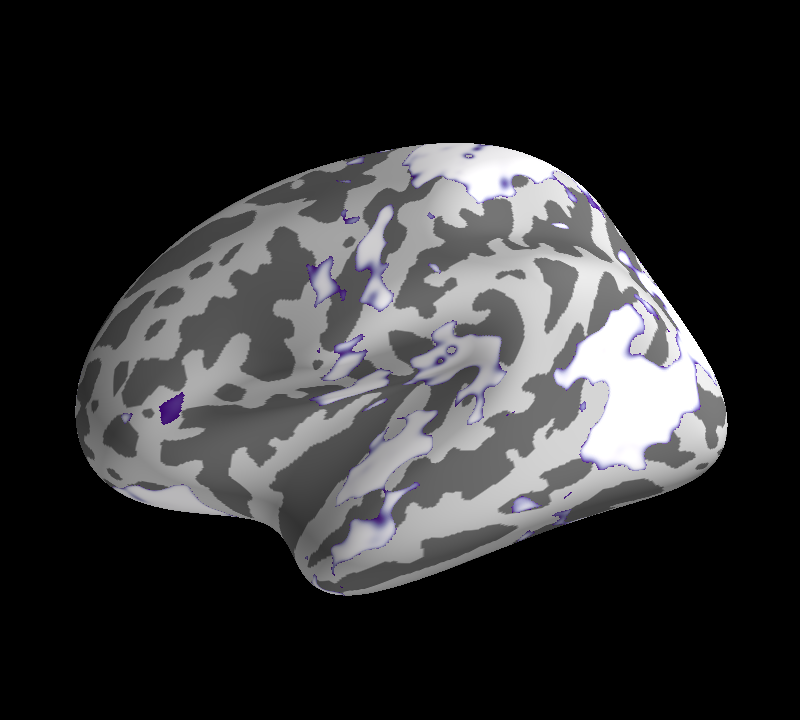

In [19]:
#Inflated -- LATERAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "lh", "inflated")
brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
brain.overlays["surf_data1"].pos_bar.lut_mode = "Purples"
brain.overlays["surf_data1"].pos_bar.visible = False
#brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
#brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
#brain.overlays["surf_data2"].pos_bar.visible = False
brain.save_image("/home/arenf001/lh_lat_PN.png")
Image("/home/arenf001/lh_lat_PN.png")

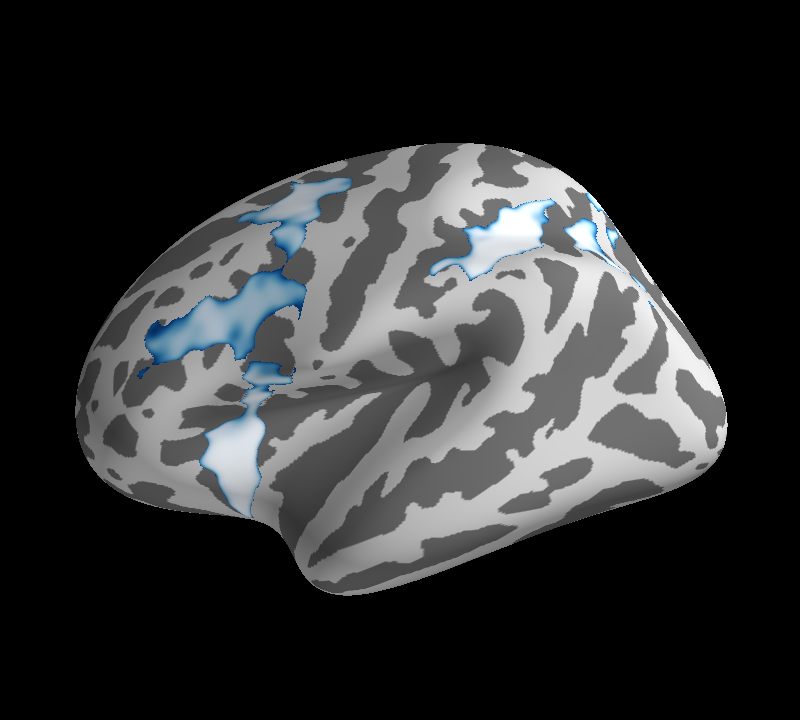

In [16]:
#Inflated -- LATERAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "lh", "inflated")
#brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
#brain.overlays["surf_data1"].pos_bar.lut_mode = "Reds"
#brain.overlays["surf_data1"].pos_bar.visible = False
brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
brain.overlays["surf_data2"].pos_bar.visible = False
brain.save_image("/home/arenf001/lh_lat_CN.png")
Image("/home/arenf001/lh_lat_CN.png")

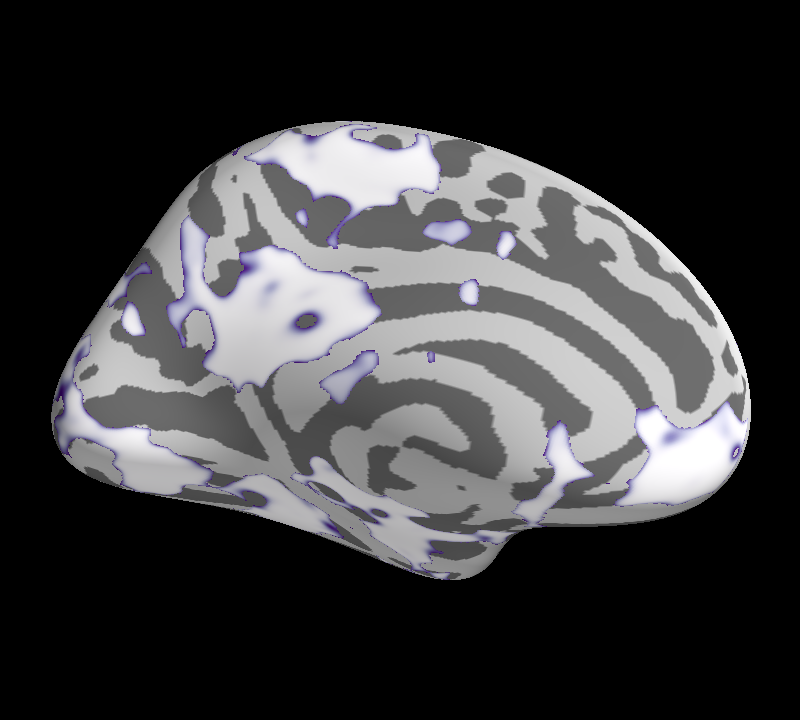

In [20]:
#Inflated -- MEDIAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "lh", "inflated")
brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
brain.overlays["surf_data1"].pos_bar.lut_mode = "Purples"
brain.overlays["surf_data1"].pos_bar.visible = False
#brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
#brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
#brain.overlays["surf_data2"].pos_bar.visible = False
brain.show_view("medial")
brain.save_image("/home/arenf001/lh_med_PN.png")
Image("/home/arenf001/lh_med_PN.png")

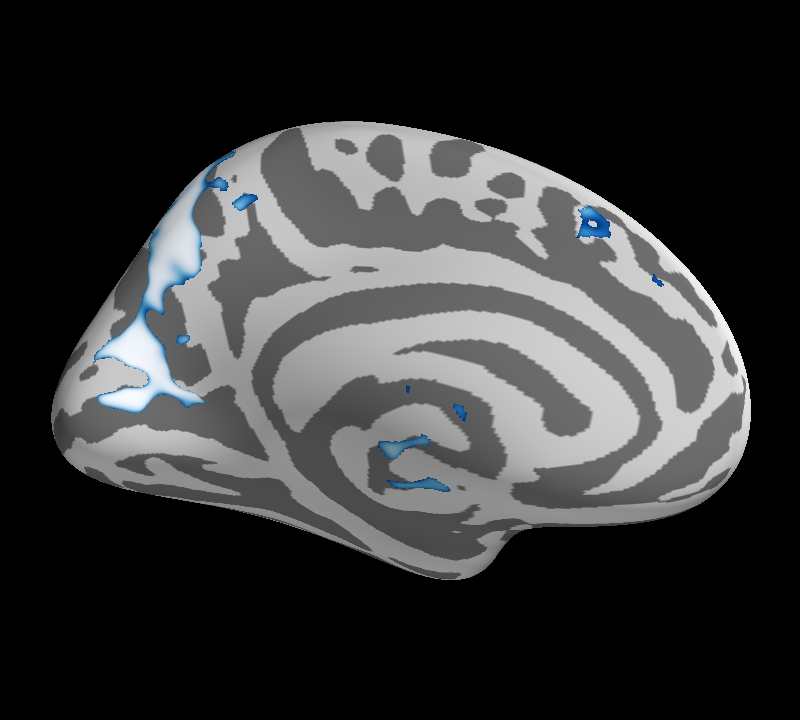

In [18]:
#Inflated -- MEDIAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "lh", "inflated")
#brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
#brain.overlays["surf_data1"].pos_bar.lut_mode = "Reds"
#brain.overlays["surf_data1"].pos_bar.visible = False
brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
brain.overlays["surf_data2"].pos_bar.visible = False
brain.show_view("medial")
brain.save_image("/home/arenf001/lh_med_CN.png")
Image("/home/arenf001/lh_med_CN.png")

## Right Hemisphere

In [21]:
#Inflated -- lateral view
surf_data1 = io.project_volume_data(fixed_less_cond_file, "rh", reg_file)
surf_data2 = io.project_volume_data(cond_less_fixed_file, "rh", reg_file)

brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "rh", "inflated")
brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
brain.overlays["surf_data1"].pos_bar.lut_mode = "Purples"
brain.overlays["surf_data1"].pos_bar.visible = False
#brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
#brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
#brain.overlays["surf_data2"].pos_bar.visible = False
brain.save_image("/tmp/my3dbrain.png")
Image("/tmp/my3dbrain.png")

NameError: name 'fixed_less_cond_file' is not defined

In [ ]:
#Inflated -- MEDIAL view

brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "rh", "inflated")
#brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
#brain.overlays["surf_data1"].pos_bar.lut_mode = "Reds"
#brain.overlays["surf_data1"].pos_bar.visible = False
brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
brain.overlays["surf_data2"].pos_bar.lut_mode = "Reds"
#brain.overlays["surf_data2"].pos_bar.visible = False
brain.show_view("medial")
brain.save_image("/tmp/my3dbrain.png")
Image("/tmp/my3dbrain.png")

In [ ]:
#Inflated -- DORSAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "rh", "inflated")
brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
brain.overlays["surf_data1"].pos_bar.lut_mode = "Reds"
brain.overlays["surf_data1"].pos_bar.visible = False
brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
brain.overlays["surf_data2"].pos_bar.visible = False
brain.show_view("dor")
brain.save_image("/tmp/my3dbrain.png")
Image("/tmp/my3dbrain.png")

In [ ]:
#Inflated -- VENTRAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "rh", "inflated")
brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
brain.overlays["surf_data1"].pos_bar.lut_mode = "Reds"
brain.overlays["surf_data1"].pos_bar.visible = False
brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
brain.overlays["surf_data2"].pos_bar.visible = False
brain.show_view("ven")
brain.save_image("/tmp/my3dbrain.png")
Image("/tmp/my3dbrain.png")

In [ ]:
#Inflated -- CAUDAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "rh", "inflated")
brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
brain.overlays["surf_data1"].pos_bar.lut_mode = "Reds"
brain.overlays["surf_data1"].pos_bar.visible = False
brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
brain.overlays["surf_data2"].pos_bar.visible = False
brain.show_view("caudal")
brain.save_image("/tmp/my3dbrain.png")
Image("/tmp/my3dbrain.png")

In [ ]:
#Inflated -- ROSTRAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "rh", "inflated")
brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
brain.overlays["surf_data1"].pos_bar.lut_mode = "Reds"
brain.overlays["surf_data1"].pos_bar.visible = False
brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
brain.overlays["surf_data2"].pos_bar.visible = False
brain.show_view("rostral")
brain.save_image("/tmp/my3dbrain.png")
Image("/tmp/my3dbrain.png")

In [ ]:
#Inflated -- FRONTAL view
brain = Brain("/home/data/madlab/surfaces/wmaze/fsaverage/", "rh", "inflated")
brain.add_overlay(surf_data1, min=.95, max=1, name="surf_data1")
brain.overlays["surf_data1"].pos_bar.lut_mode = "Reds"
brain.overlays["surf_data1"].pos_bar.visible = False
brain.add_overlay(surf_data2, min=.95, max=1, name="surf_data2")
brain.overlays["surf_data2"].pos_bar.lut_mode = "Blues"
brain.overlays["surf_data2"].pos_bar.visible = False
brain.show_view("frontal")
brain.save_image("/tmp/my3dbrain.png")
Image("/tmp/my3dbrain.png")